# Algorism Study_2nd Week (08.03~08.09)
## CH3& CH4 (time-complexity & divide and conquer approach(분할정복) )


### Notation:
* 1) Θ-notation
* 2) O-notation
* 3) Ω-notation



## Complexties (Worst case)
### If-Then-Else
* the worst-case time is the slower of the two possibilities: max(time(block 1),time(block 2))
#### (if then else statement=>O(1) , O(n) 면 O(n)이다.)

### Loops
* loop ( for i in range(1,n+1) )가 n번 반복되면 :뒤 부분 n번 반복 => 한번이 O(1) 이면 전체는 n * O(1) (O(n))이 된다.
* for 안에 for 있으면 그럼 O(n*m)



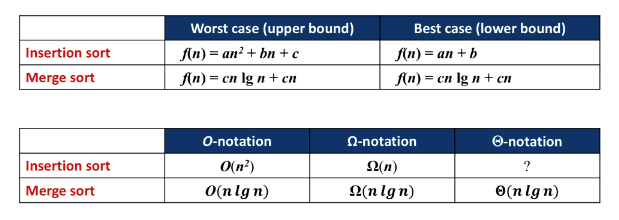

### Divide and conquer approach

* Recursive case : subproblem을 재귀적으로 풀만큼 충분히 클 때
* Base case: 더이상 재귀적으로 풀 지 않아도 될만큼 작아졌을때


## Coding Example
#### Algorism
* 1. 정렬할 데이터 집합의 크기가 0또는 1이면 이미 정렬된 것으로 보고, 그렇지 않으면 데이터 집합을 반으로 나눈다.
* 2. 데이터 집합을 반으로 나눈다.
* 3. 원래 같은 집합에서 나뉘어져 나온 데이터 집합 둘을 병합하여 하나의 데이터 집합으로 만든다. 단,병합할 때 데이터 집합의 원소는 순서에 맞춰 정렬한다.
* 4. 데이터 집합이 다시 하나가 될 때까지 3을 반복한다.

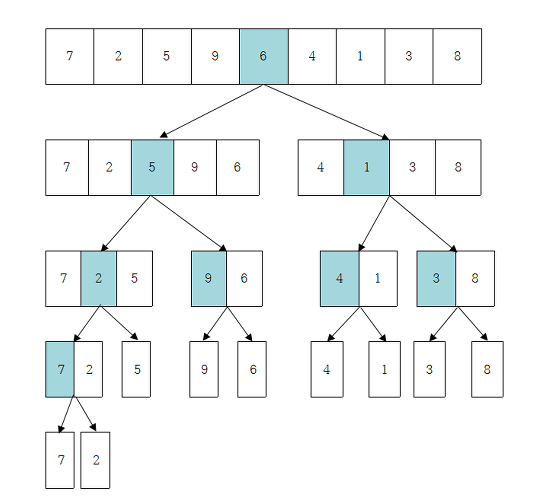

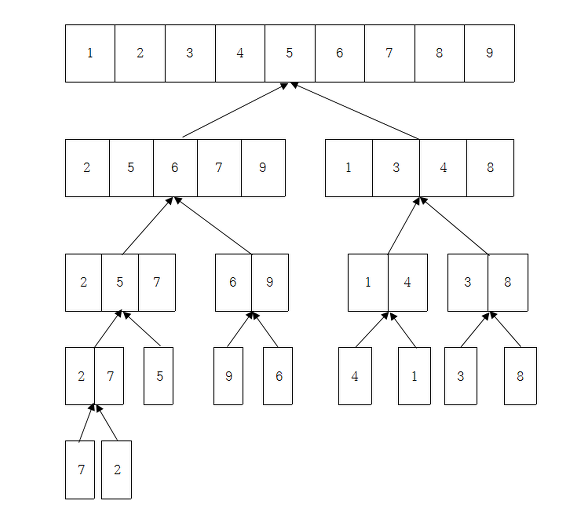

In [19]:
A= [7,2,5,9,6,4,1,3,8]
def dc(A):
    n=len(A)
    if n<2:
        return
    mid=len(A)//2
    g1=A[:mid]
    g2=A[mid:]
    dc(g1)
    dc(g2)
    i1=0
    i2=0
    iA=0
    while i1 < len(g1) and i2 < len(g2):
        if g1[i1] < g2[i2]:
            A[iA] = g1[i1]
            i1 += 1
            iA += 1
        else:
            A[iA] = g2[i2]
            i2 += 1
            iA += 1
    while i1 < len(g1):
        A[iA] = g1[i1]
        i1 += 1
        iA += 1
    while i2 < len(g2):
        A[iA] = g2[i2]
        i2 += 1
        iA += 1
dc(A)
print(A)

[1, 2, 3, 4, 5, 6, 7, 8, 9]


### 교재 예시 그대로

In [26]:
def fmcs(A,low,mid,high):
    left_sum= -11111
    sum = 0
    for i in range(mid,low):
        sum=sum+A[i]
        if sum > left_sum:
            left_sum=sum
            max_left=i
    right_sum=-11111
    sum=0
    for j in range(mid+1,high):
        sum= sum+A[j]
        if sum > right_sum:
            right_sum=sum
            max_right= j
    return(max_left,max_right,left_sum+right_sum)

In [30]:
def fms(A,low,high):
    if high==low:
        return(low,high,A[low])
    else: 
        mid = (low+high)/2
        (left_low,left_high,left_sum)=fms(A,low,mid)
        (right_low,right_high,right_sum)=fms(A,mid+1,high)
        (cross_low,cross_high,cross_sum)=fmcs(A,low,mid,high)
        if left_sum >= right_sum and right_sum >=cross_sum:
            return (left_low,left_high,left_sum)
        elif right_sum >= left_sum and right_sum >=cross_sum:
            return(right_low,right_high,right_sum)
        else:
            return(cross_low,cross_high,cross_sum)
        

### Master method

  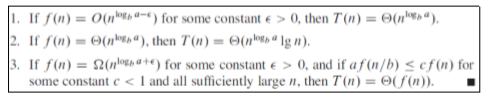  

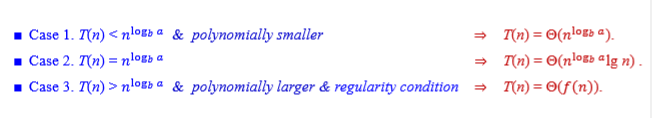

#### "Polynomially Large" means
#### the ratio of the functions falls between two polynimials, asymptotically (점증적으로 두 다항 사이에 속한다.)
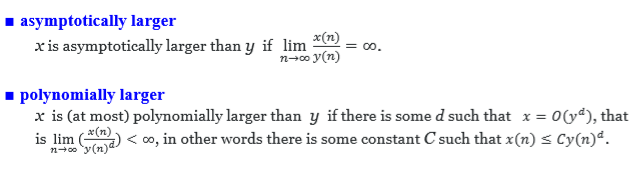

수포자는 수학을 포기한 사람의 준말입니다. 수포자 삼인방은 모의고사에 수학 문제를 전부 찍으려 합니다. 수포자는 1번 문제부터 마지막 문제까지 다음과 같이 찍습니다.

* 1번 수포자가 찍는 방식: 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, ...
* 2번 수포자가 찍는 방식: 2, 1, 2, 3, 2, 4, 2, 5, 2, 1, 2, 3, 2, 4, 2, 5, ...
* 3번 수포자가 찍는 방식: 3, 3, 1, 1, 2, 2, 4, 4, 5, 5, 3, 3, 1, 1, 2, 2, 4, 4, 5, 5, ...

1번 문제부터 마지막 문제까지의 정답이 순서대로 들은 배열 answers가 주어졌을 때, 가장 많은 문제를 맞힌 사람이 누구인지 배열에 담아 return 하도록 solution 함수를 작성해주세요.

제한 조건
시험은 최대 10,000 문제로 구성되어있습니다.
문제의 정답은 1, 2, 3, 4, 5중 하나입니다.
가장 높은 점수를 받은 사람이 여럿일 경우, return하는 값을 오름차순 정렬해주세요.
입출력 예
* answers	return
* [1,2,3,4,5]	[1]
* [1,3,2,4,2]	[1,2,3]
* 입출력 예 설명
* 입출력 예 #1

* 수포자 1은 모든 문제를 맞혔습니다.
* 수포자 2는 모든 문제를 틀렸습니다.
* 수포자 3은 모든 문제를 틀렸습니다.
* 따라서 가장 문제를 많이 맞힌 사람은 수포자 1입니다.

* 입출력 예 #2

* 모든 사람이 2문제씩을 맞췄습니다.

# 프로그래머스 문제 1

In [119]:
def solution(answers):
    m1,m2,m3=[1,2,3,4,5],[2,1,2,3,2,4,2,5],[ 3, 3, 1, 1, 2, 2, 4, 4, 5, 5]
    x1_score,x2_score,x3_score=0,0,0
    for i in range(0,len(answers)):
        if m1[i%5]==answers[i]:
            x1_score += 1
        if m2[i%8]==answers[i]:
            x2_score += 1
        if m3[i%10]==answers[i]:
            x3_score += 1
    maxx=[x1_score,x2_score,x3_score]
    answer=[]
    if x1_score==max(maxx):
        answer.append(1)
    if x2_score==max(maxx):
        answer.append(2)
    if x3_score==max(maxx):
        answer.append(3)
        
    return answer

## 프로그래머스 2번

한자리 숫자가 적힌 종이 조각이 흩어져있습니다. 흩어진 종이 조각을 붙여 소수를 몇 개 만들 수 있는지 알아내려 합니다.

각 종이 조각에 적힌 숫자가 적힌 문자열 numbers가 주어졌을 때, 종이 조각으로 만들 수 있는 소수가 몇 개인지 return 하도록 solution 함수를 완성해주세요.

* 제한사항
* numbers는 길이 1 이상 7 이하인 문자열입니다.
* numbers는 0~9까지 숫자만으로 이루어져 있습니다.
* 013은 0, 1, 3 숫자가 적힌 종이 조각이 흩어져있다는 의미입니다.
* 입출력 예
* numbers	return
* 17	3
* 011	2
* 입출력 예 설명
* 예제 #1
* [1, 7]으로는 소수 [7, 17, 71]를 만들 수 있습니다.

* 예제 #2
* [0, 1, 1]으로는 소수 [11, 101]를 만들 수 있습니다.

* 11과 011은 같은 숫자로 취급합니다.

In [219]:
numbers="011"
solution(numbers)

2

In [215]:
import itertools
def solution(numbers):
    
    def is_prime(n: int) -> bool: 
        if n < 2: 
            return False 
        if n in (2, 3): 
            return True 
        if n % 2 is 0 or n % 3 is 0: 
            return False 
        if n < 9: 
            return True 
        k, l = 5, n**0.5 
        while k <= l: 
            if n % k is 0 or n % (k+2) is 0: 
                return False 
            k += 6 
        return True

    lst = range(0,len(numbers))
    per=[]
    permuatation =  itertools.permutations(lst)
    for i in permuatation:
            per.append(i)
    per

    numb=sorted(numbers)
    answer=0
    temp2=[]
    temp=""
    for i in range(0,len(per)):
        temp=""
        for j in range(0,len(numbers)):
                    temp=temp+numb[per[i][j]]
                    temp2.append(int(temp))
    temp2=list(set(temp2))
    temp2
    answer=0
    for i in range(0,len(temp2)):
        if is_prime(temp2[i])==True:
            answer+=1
    return answer

In [208]:
numbers="17"

    def is_prime(n: int) -> bool: 
        if n < 2: 
            return False 
        if n in (2, 3): 
            return True 
        if n % 2 is 0 or n % 3 is 0: 
            return False 
        if n < 9: 
            return True 
        k, l = 5, n**0.5 
        while k <= l: 
            if n % k is 0 or n % (k+2) is 0: 
                return False 
            k += 6 
        return True

    lst = range(0,len(numbers))
    per=[]
    permuatation =  itertools.permutations(lst)
    for i in permuatation:
            per.append(i)
    per

    numb=sorted(numbers)
    answer=0
    temp2=[]
    temp=""
    for i in range(0,len(per)):
        temp=""
        for j in range(0,len(numbers)):
                    temp=temp+numb[per[i][j]]
                    temp2.append(int(temp))
    temp2=list(set(temp2))
    temp2
    answer=0
    for i in range(0,len(temp2)):
        if is_prime(temp2[i])==True:
            answer+=1
    answer

## 프로그래머스 3번

In [342]:
def solution(brown, yellow):
    def divisor(n):
        d=[]
        for i in range(1,n+1):
            if n % i==0 :
                d.append(i)
        return(d)
    divv=divisor(yellow)
    divvv=divisor(yellow+brown)
    answer=[]
    if len(divv) % 2 == 1:
        answer= [divv[len(divv) // 2]+2,divv[len(divv) // 2]+2]
    else:
        for i in range(1,(len(divvv) // 2) +1 ):
                if 2*(divvv[i]+divvv[len(divvv)-i-1])-4 == brown :
                    if divvv[i]>divvv[len(divvv)-i-1] :
                        answer=[divvv[i],divvv[len(divvv)-i-1]]
                    else:answer=[divvv[len(divvv)-i-1],divvv[i]]
    return(answer)
                    

[4, 3]